# Exploring Brazilian E-commerce Data
___

`introducción y explicación`

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf

In [2]:
#Generate DataFrames

consumers = pd.read_csv('./data/olist_customers_dataset.csv')
sellers = pd.read_csv('./data/olist_sellers_dataset.csv')
geoloc = pd.read_csv('./data/olist_geolocation_dataset.csv')
order_master = pd.read_csv('./data/olist_orders_dataset.csv')
order_items = pd.read_csv('./data/olist_order_items_dataset.csv')
order_payments = pd.read_csv('./data/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('./data/olist_order_reviews_dataset.csv')
products = pd.read_csv('./data/olist_products_dataset.csv')


In [3]:
#Change DataType for date-time data in 2 tables

order_master[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
              'order_delivered_customer_date', 'order_estimated_delivery_date']] = order_master[['order_purchase_timestamp', 
                                                                                                 'order_approved_at', 
                                                                                                 'order_delivered_carrier_date', 
                                                                                                 'order_delivered_customer_date', 
                                                                                                 'order_estimated_delivery_date']].astype('datetime64')
order_master.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [4]:
order_items['shipping_limit_date'] = order_items['shipping_limit_date'].astype('datetime64')

order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [5]:
#remove columns that will not be used

order_master = order_master.drop('order_status', axis=1)
order_master.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [6]:
order_payments = order_payments.drop('payment_sequential', axis=1)
order_payments.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [7]:
order_reviews = order_reviews.drop(['review_comment_title', 
                                    'review_comment_message', 
                                    'review_creation_date', 
                                    'review_answer_timestamp'], axis=1)
order_reviews.head()

,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [8]:
products = products.drop(['product_name_lenght', 
                          'product_description_lenght', 
                          'product_photos_qty'], axis=1)
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [9]:
#Deal with null values

order_master = order_master.dropna()
order_master.shape

(96461, 7)

In [10]:
products['product_category_name'] = products['product_category_name'].fillna('outro')
products['product_category_name'].value_counts()

cama_mesa_banho                                  3029
esporte_lazer                                    2867
moveis_decoracao                                 2657
beleza_saude                                     2444
utilidades_domesticas                            2335
automotivo                                       1900
informatica_acessorios                           1639
brinquedos                                       1411
relogios_presentes                               1329
telefonia                                        1134
bebes                                             919
perfumaria                                        868
fashion_bolsas_e_acessorios                       849
papelaria                                         849
cool_stuff                                        789
ferramentas_jardim                                753
pet_shop                                          719
outro                                             610
eletronicos                 

In [11]:
products[['product_weight_g', 
          'product_length_cm', 
          'product_height_cm', 
          'product_width_cm']] = products[['product_weight_g', 
                                           'product_length_cm', 
                                           'product_height_cm', 
                                           'product_width_cm']].fillna(0)

products.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

In [203]:
#Set chart settings
sns.set(style='white', palette='rocket', rc={'figure.figsize':(15,10)})

## 0. Overall Data Description
--- 

Primero descripción de los datos:
- Geolocalización (si da tiempo) **merge geolocalización con tabal de clientes o de vendedores por CEP

In [299]:
#Grouping costumers by state and region
c_states = pd.DataFrame(consumers.customer_state.value_counts()).reset_index()

def reg_class(x):
    if x in ['SP', 'RJ', 'MG', 'ES']:
        return 'Southeast'
    elif x in ['RS', 'SC', 'PR']:
        return 'South'
    elif x in ['DF', 'GO', 'MT', 'MS']:
        return 'Center'
    elif x in ['AM', 'AC', 'RO', 'RR', 'PA', 'TO', 'AP']:
        return 'North'
    else:
        return 'Northeast'

c_states['region'] = list(map(reg_class, c_states['index']))
c_states.columns = ['state', 'total_customers', 'region']
c_states = c_states[['region', 'state', 'total_customers']]

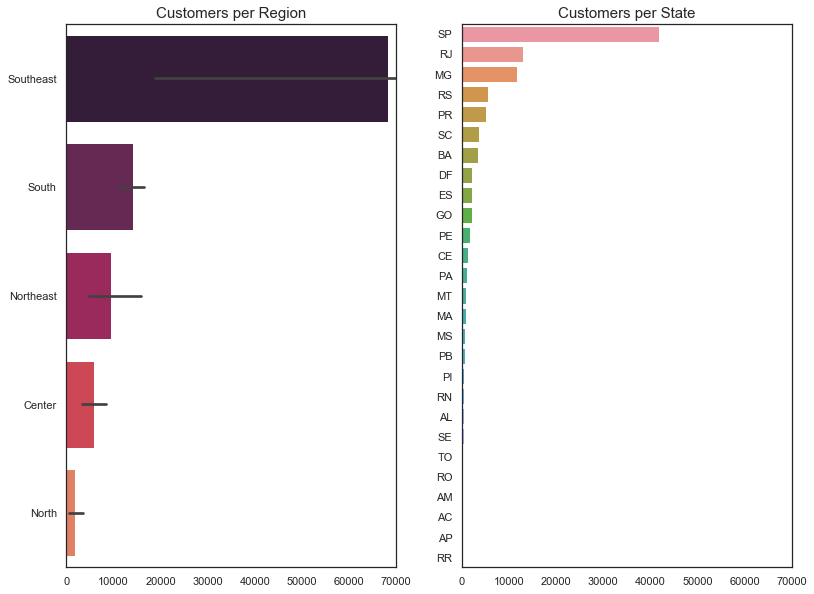

In [294]:
f, (gal1, gal2) = plt.subplots(1,2,figsize=(13, 10), sharex=True)

sns.barplot(x='total_customers', y='region', data=c_states, ax=gal1, estimator=sum)
gal1.set(ylabel="", xlabel='', xlim=(0,70000))
gal1.set_title('Customers per Region', fontsize=15)

sns.barplot(x='total_customers', y='state', data=c_states, ax=gal2)
gal2.set(ylabel="", xlabel='', xlim=(0,70000))
gal2.set_title('Customers per State', fontsize=15)

plt.show()

In [300]:
sellers.columns

Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')

In [305]:
#Same process with sellers:

s_states = pd.DataFrame(sellers.seller_state.value_counts()).reset_index()

def reg_class(x):
    if x in ['SP', 'RJ', 'MG', 'ES']:
        return 'Southeast'
    elif x in ['RS', 'SC', 'PR']:
        return 'South'
    elif x in ['DF', 'GO', 'MT', 'MS']:
        return 'Center'
    elif x in ['AM', 'AC', 'RO', 'RR', 'PA', 'TO', 'AP']:
        return 'North'
    else:
        return 'Northeast'

s_states['region'] = list(map(reg_class, s_states['index']))
s_states.columns = ['state', 'total_sellers', 'region']
s_states = s_states[['region', 'state', 'total_sellers']]

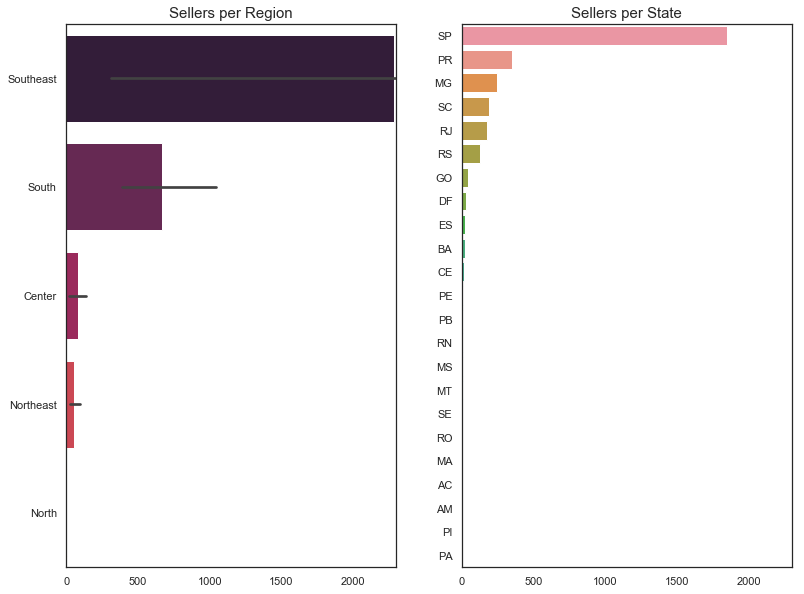

In [312]:
f, (gal3, gal4) = plt.subplots(1,2,figsize=(13, 10), sharex=True)

sns.barplot(x='total_sellers', y='region', data=s_states, ax=gal3, estimator=sum)
gal3.set(ylabel="", xlabel='', xlim=(0,2300))
gal3.set_title('Sellers per Region', fontsize=15)

sns.barplot(x='total_sellers', y='state', data=s_states, ax=gal4)
gal4.set(ylabel="", xlabel='')
gal4.set_title('Sellers per State', fontsize=15)

plt.show()

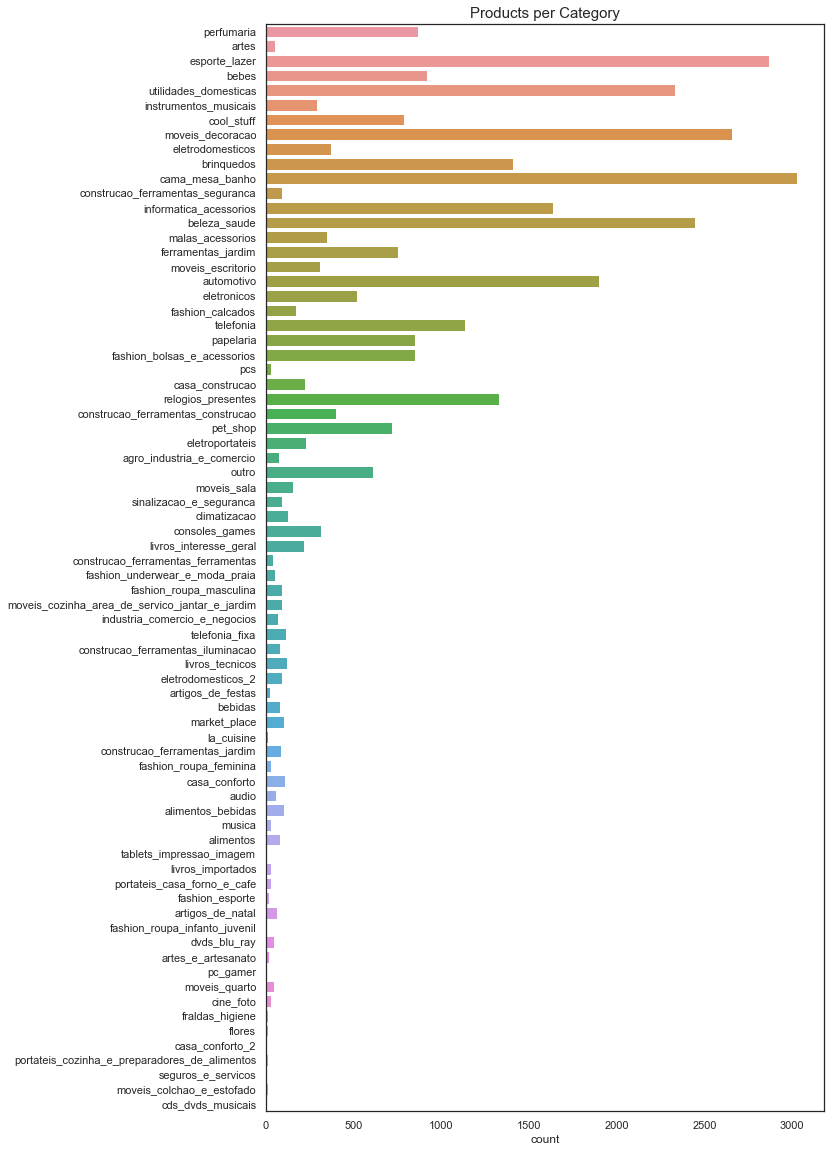

In [288]:
#total of order
f, gal3 = plt.subplots(figsize=(10, 20))

sns.countplot(y = 'product_category_name', data= products)

gal3.set_title('Products per Category', fontsize=15)
gal3.set(ylabel='')

plt.show()

## 1. Orders Data:
---


In [183]:
#sns.lineplot(data=order_master['order_purchase_timestamp'])

#1. Generar columna de mes/semana etc con base en la columna de timestamp
#2. Groupby x fecha vs conteo - resetar index para que sea tabla normal

## 2. Product Data:
---

**Gráficas:**
- Dimensions vs Freight; --> scatter product_weight vs freight_value; scatter product_length_cm, product_height_cm, product width_cm vs freight_value

In [124]:
#Merge order with products keeping order structure.
#Creating new column to aggregate order value
order_products = order_items.merge(products, how='left', on='product_id')
order_products['total_payed'] = order_products['price'] + (order_products['freight_value'] * order_products['order_item_id'])
order_products.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,total_payed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,650.0,28.0,9.0,14.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,30000.0,50.0,30.0,40.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,3050.0,33.0,13.0,33.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,200.0,16.0,10.0,15.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,3750.0,35.0,40.0,30.0,218.04


In [225]:
#Generating agg table of sales per category
#Including a classification of sales based on the amount sold

venta_por_categoria = order_products.groupby('product_category_name')['total_payed', 
                                                                      'order_item_id'].sum().sort_values(by='total_payed', 
                                                                                                        ascending=False).reset_index()
venta_por_categoria.columns = ['category', 'total_sold', 'total_items']
venta_por_categoria['selling_cat'] = pd.cut(venta_por_categoria['total_sold'], 
                                           5, 
                                           labels=['low', 'medium-low', 'medium', 'medium-high', 'high'])

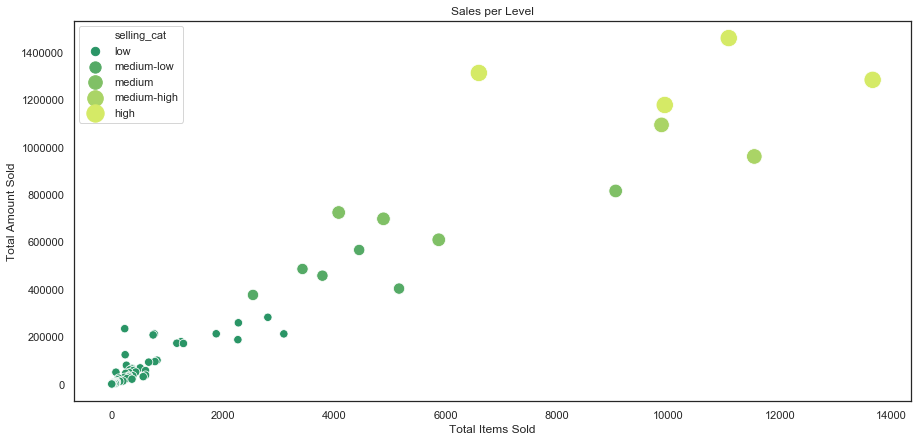

In [184]:
#Scatter plot of sales vs items sold with color distinction per selling category
f, or1 = plt.subplots(figsize=(15, 7))

sns.scatterplot(x='total_items', 
                y='total_sold', 
                hue='selling_cat',
                size='selling_cat',
                sizes=(70,300), 
                size_order=['high', 'medium-high', 'medium', 'medium-low', 'low'],
                data=venta_por_categoria, 
                legend='full', 
                palette='summer')

or1.set(xlabel='Total Items Sold', ylabel='Total Amount Sold')
or1.set_title('Sales per Level')
plt.show()

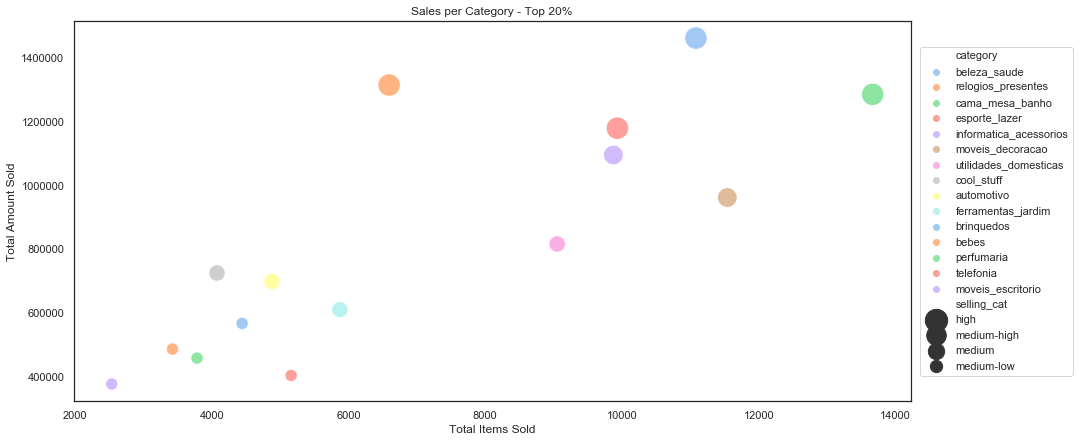

In [249]:
#Create a sub-set that excludes the 80% of categories that sell the least. 
#Repeat the plot with only the top 20%, including category names
best_sell = venta_por_categoria[(venta_por_categoria['selling_cat'] != 'low')]
f, or2 = plt.subplots(figsize=(15, 7))

sns.scatterplot(x='total_items', 
                y='total_sold', 
                hue='category',
                size='selling_cat',
                sizes=(150,500), 
                size_order=['high', 'medium-high', 'medium', 'medium-low'],
                data=best_sell, 
                legend='full', 
                palette='pastel')

or2.set(xlabel='Total Items Sold', ylabel='Total Amount Sold')
or2.set_title('Sales per Category - Top 20%')
or2.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.show()

## 3. Payment:
---

**Preparar:**
- Agregar payment_type y installment al dataset fusionado del paso 2

**Gráficas:**
- payment_type y payment_installment x product_type --> scatter con bubble por tipo

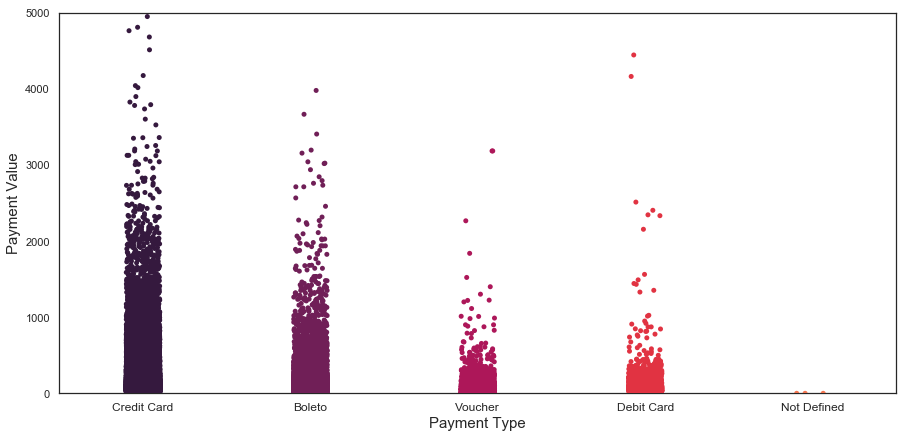

In [185]:
#payment_type vs payment_value
f, pay1 = plt.subplots(figsize=(15, 7))

sns.stripplot(x='payment_type', y='payment_value', data=order_payments)

pay1.set(ylim=(0,5000))
pay1.set_xlabel('Payment Type',fontsize=15)
pay1.set_ylabel('Payment Value',fontsize=15)

plt.xticks([0,1,2,3,4], 
            ['Credit Card', 'Boleto', 'Voucher', 'Debit Card', 'Not Defined'], 
            fontsize=12)
plt.show()

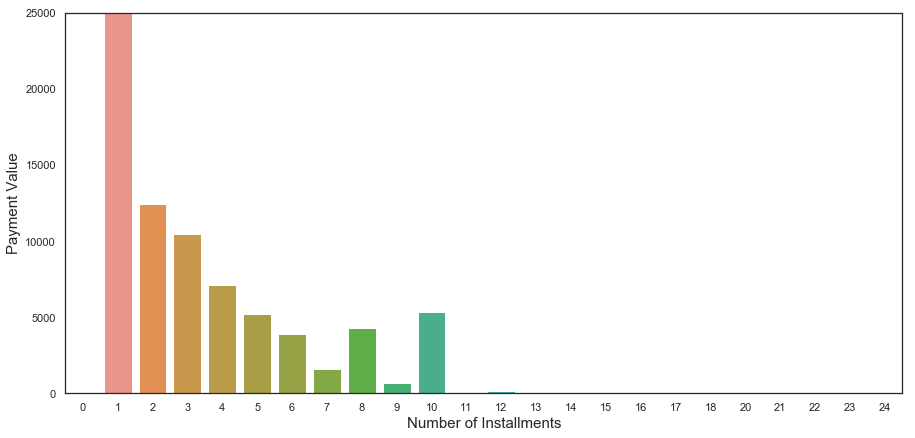

In [186]:
#payment_installment (filtrado solo creditcard) vs payment_value --> scatter con línea de regresión

credito = order_payments[order_payments['payment_type'] == 'credit_card']

f, pay2 = plt.subplots(figsize=(15, 7))

sns.barplot(x='payment_installments', 
            y='payment_value', 
            data=credito, 
            estimator=lambda x: len(x))

pay2.set(ylim=(0,25000))
pay2.set_xlabel('Number of Installments',fontsize=15)
pay2.set_ylabel('Payment Value',fontsize=15)

plt.show()

## 4. Delivery and Reviews
---

**Preparar:**
- Merge order_reviews + orders_dataset:
    - on order_id
    - solamente con siguientes columnas:
        - de orders_dataset:
            - order_id
            - order_purchase_time
            - order_approved_at
            - order_delivered_carrier_date
            - order_delivered_customer_date
            - order_estimated_delivery_date
        - de order_reviews:
            - order_id
            - review_score
    
**Gráficas:**
- Diferencias agrupadas por review_score
- Review Score --> barras apiladas 100%

In [28]:
import datetime
order_master.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [29]:
#Generate delivery-efficiency table with 6 variables: order_id, 
eficiencia = pd.DataFrame(order_master['order_estimated_delivery_date'] - order_master['order_delivered_customer_date'])
eficiencia['promesa'] = np.where(eficiencia[0] >= datetime.timedelta(days=0), 1, 0)
eficiencia.columns = ['dif_promesa', 'promesa']
eficiencia['tiempo_transito'] = order_master['order_delivered_customer_date'] - order_master['order_delivered_carrier_date']
eficiencia['tiempo_total'] = order_master['order_delivered_customer_date'] - order_master['order_purchase_timestamp']
eficiencia['order_id'] = order_master['order_id']
eficiencia['review_score'] = order_reviews['review_score']
eficiencia = eficiencia[['order_id', 'tiempo_total', 'tiempo_transito', 'dif_promesa', 'promesa', 'review_score']]

In [30]:
def convertir_dias(x):
    return x.days

eficiencia['tiempo_total_dias'] = eficiencia['tiempo_total'].apply(convertir_dias)
eficiencia['tiempo_transito_dias'] = eficiencia['tiempo_transito'].apply(convertir_dias)
eficiencia['dif_promesa_dias'] = eficiencia['dif_promesa'].apply(convertir_dias)

eficiencia = eficiencia[['order_id', 
                         'tiempo_total', 
                         'tiempo_total_dias', 
                         'tiempo_transito', 
                         'tiempo_transito_dias', 
                         'dif_promesa', 
                         'dif_promesa_dias', 
                         'promesa', 
                         'review_score']]

[(-50, 60), Text(0.5, 0, 'Difference of Promised Days Distribution')]

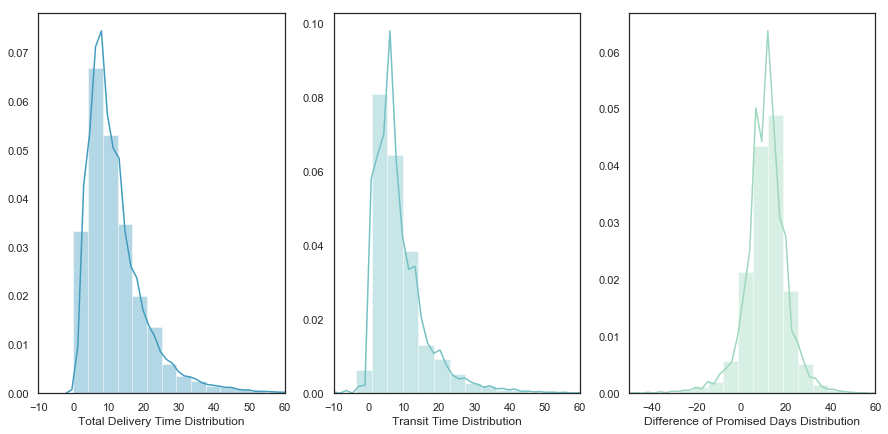

In [187]:
#Primera exploración de distribución de días. El tiempo total y Tiempo de Transito parecen caminar juntos.
#La mayoría de los pedidos tiene "días extra" con respecto a la promesa. Es decir, se entregaron antes.
#Sin embargo, hay una parte en la que no se cumplió la promesa. Vamos a ver si esto impacta la satisfacción.
paleta = sns.mpl_palette("GnBu_d", 10)
f, (rev1,rev2,rev3) = plt.subplots(1,3, figsize=(15, 7))

sns.distplot(eficiencia['tiempo_total_dias'], ax=rev1, color=paleta[4])
rev1.set(xlim=(-10,60), xlabel='Total Delivery Time Distribution')
sns.distplot(eficiencia['tiempo_transito_dias'], ax=rev2, color=paleta[7])
rev2.set(xlim=(-10,60), xlabel='Transit Time Distribution')
sns.distplot(eficiencia['dif_promesa_dias'], ax=rev3, color=paleta[9])
rev3.set(xlim=(-50,60), xlabel='Difference of Promised Days Distribution')

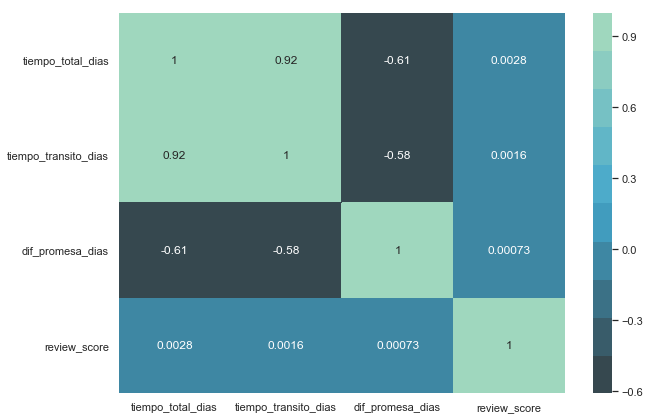

In [188]:
#En el mapa de correlación, vemos que ninguna de la diferencia de tiempos está correlacionada a la satisfacción, si
#Revisamos toda la muestra.
#Lo que sí hay relación es entre la diferencia de promesa y las demás variables de tiempo.
#Es una relación un tanto obvia, ya que quanto menor es el tiempo de entrega, 
#mayor es la diferencia entre promesa y entrega real. 

corre = eficiencia[['tiempo_total_dias', 'tiempo_transito_dias', 'dif_promesa_dias', 'review_score']].corr()

f, rev4 = plt.subplots(figsize=(10, 7))
sns.heatmap(corre, annot=True, cmap=paleta)

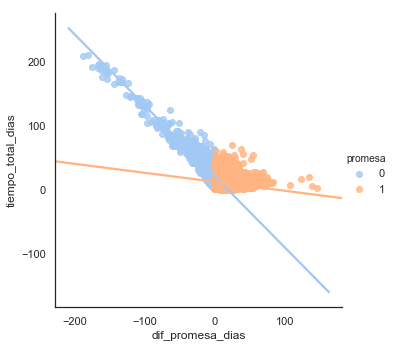

In [189]:
sns.lmplot(x='dif_promesa_dias', 
            y='tiempo_total_dias', 
            hue='promesa', 
            data=eficiencia, 
           palette='pastel')
plt.show()